In [1]:
import visualization as viz
import numpy as np
from matplotlib import pyplot
import glob
import os
from astropy.io import fits

In [2]:
%matplotlib inline

In [3]:
LCO_DATA_DIR = '../data/spectra/lco'
FIG_DIR = '../figures'
SWIFT_DATA_DIR = '../data/swiftuvot/reduced/00034040001/uvot/image'

In [37]:
swift_obs = '00034040001_x1dsum.fits'
#lco_obs = 'asassn-15oz_20150906_redblu_105042.698_multi.fits'
lco_obs = 'asassn15oz_20150904_redblu_122216.314_multi.fits'
lco_obs2 = 'asassn-15oz_20150906_redblu_105042.698a_multi.fits'

In [38]:
good_range = [1700,2740]
contamination_range = [2740, 5000]
bad_range = [5000, 10000]

In [39]:
swift_data = fits.open(os.path.join(SWIFT_DATA_DIR, swift_obs))
lco_data = fits.open(os.path.join(LCO_DATA_DIR, lco_obs))
lco_data2 = fits.open(os.path.join(LCO_DATA_DIR, lco_obs2))

In [40]:
swift_tbdata = swift_data[1].data
lco_tbdata = lco_data[1].data
lco_tbdata2 = lco_data2[1].data

(-5e-15, 3e-14)

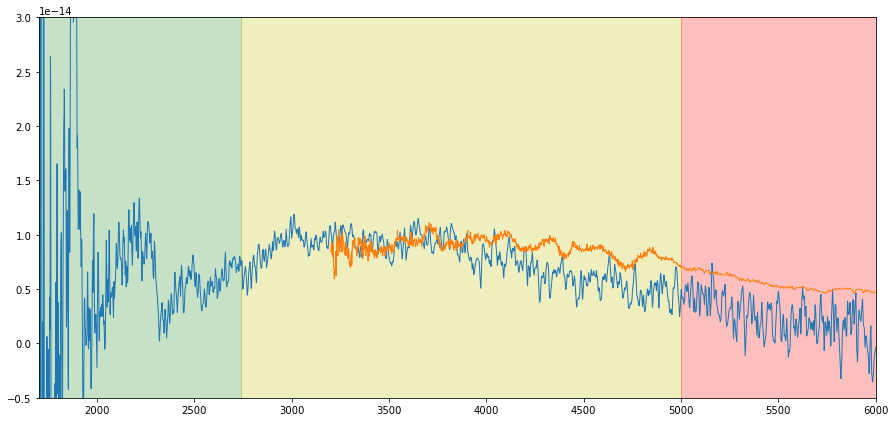

In [64]:
fig = pyplot.figure(figsize=[15, 7])
ax1 = fig.add_subplot(1,1,1)

ax1.axvspan(good_range[0], good_range[1],color='ForestGreen', alpha = 0.25)
ax1.axvspan(contamination_range[0], contamination_range[1], color='y', alpha=0.25)
ax1.axvspan(bad_range[0], bad_range[1], color='r', alpha=0.25)

ax1.plot(swift_tbdata['wave']+25, swift_tbdata['FLUX'])
ax1.plot(lco_tbdata['wavelength'], lco_tbdata['optimal_flux'])
#ax1.plot(lco_tbdata2['wavelength'], lco_tbdata2['optimal_flux'])

ax1.set_xlim(1700, 6000)
ax1.set_ylim(-0.5E-14, 3E-14)

This was to see how bad the second order contamination was. Unfortunately, I can't see anything, the flux is lower for the swift data than for the LCO data. It is encouraging that they line up at the shortest wavelength end. Its possible we need to do an aperture correction to the Swift data since I changed the slit width. It'd also be nice to get the wavelength scale correct.

In [48]:
swift_tbdata2 = fits.getdata(os.path.join(SWIFT_DATA_DIR, swift_obs).replace('0001', '0005'), 1)

(1600, 2400)

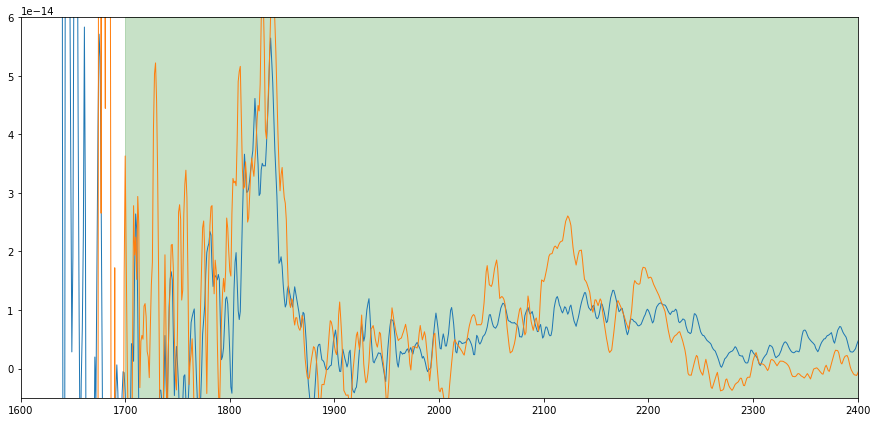

In [59]:
fig = pyplot.figure(figsize=[15, 7])
ax1 = fig.add_subplot(1,1,1)

ax1.axvspan(good_range[0], good_range[1],color='ForestGreen', alpha = 0.25)
ax1.axvspan(contamination_range[0], contamination_range[1], color='y', alpha=0.25)
ax1.axvspan(bad_range[0], bad_range[1], color='r', alpha=0.25)

ax1.plot(swift_tbdata['wave']-26, swift_tbdata['FLUX'])
ax1.plot(swift_tbdata2['wave'], swift_tbdata2['FLUX'])
ax1.set_ylim(-0.5E-14,6E-14)
ax1.set_xlim(1600, 2400)

(1600, 3500)

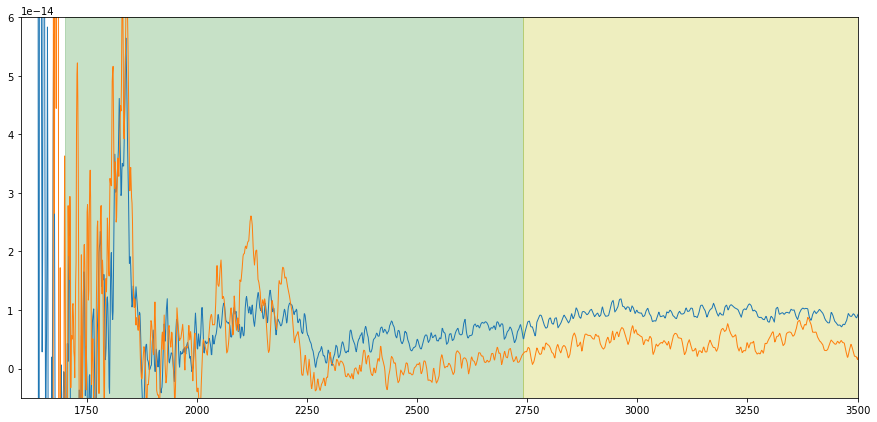

In [61]:
fig = pyplot.figure(figsize=[15, 7])
ax1 = fig.add_subplot(1,1,1)

ax1.axvspan(good_range[0], good_range[1],color='ForestGreen', alpha = 0.25)
ax1.axvspan(contamination_range[0], contamination_range[1], color='y', alpha=0.25)
ax1.axvspan(bad_range[0], bad_range[1], color='r', alpha=0.25)

ax1.plot(swift_tbdata['wave']-26, swift_tbdata['FLUX'])
ax1.plot(swift_tbdata2['wave'], swift_tbdata2['FLUX'])
ax1.set_ylim(-0.5E-14,6E-14)
ax1.set_xlim(1600, 3500)